# Mario

# Setup Mario Environment

In [86]:
# Import the joypad wrappers
from nes_py.wrappers import JoypadSpace
# Import the game
import gym_super_mario_bros
# Import the simplified controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [87]:
# Simplfy the movement of Mario using SIMPLE_Movement
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [88]:
# Setup the environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT) # Limit the action-space from 256 to the 7 basic actions by wrapping the environment in a JoypadSpace wrapper

In [89]:
# To see what the environment looks like
env.observation_space.shape  # 240 pixels by 256 pixels in 3 colors channels, which represents the frame of the game

(240, 256, 3)

In [90]:
# Randomly test the environment
done = True 
# Loop through 100000 steps (each frame in the game)
for step in range(100):
    if done:
        env.reset()
    state, reward, done, info = env.step(env.action_space.sample())
    # Show the game
    env.render()
# close the environment
env.close()


# Preprocessing Environment

In [91]:
# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation
# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, SubprocVecEnv, DummyVecEnv
# Import Matplotlib to show the impact of frame stacking
from matplotlib import pyplot as plt

In [92]:
# Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# Simplify the controls
env = JoypadSpace(env, SIMPLE_MOVEMENT) # Limit the action-space from 256 to the 7 basic actions by wrapping the environment in a JoypadSpace wrapper

In [93]:

# Gray-scale and down-sample in order to reduce the computation time for the Reinforcement Learning model
env = GrayScaleObservation(env, keep_dim=True) # Color channels will become 1

In [95]:
state = env.reset()
state.shape

(240, 256, 1)

So we jump from 240*256*3 = 184320 bits to 240*256*1 = 61440 bits!

In [96]:
# warp inside the Dummy Enivornment

env = DummyVecEnv([lambda: env])


In [97]:

# Stack frames this will give the agent some kind of memory
env = VecFrameStack(env, n_stack=4, channels_order= 'last') # Stack 4 consecutive frames together to give the agent a sense of motion

In [98]:
state = env.reset()

In [99]:
state, reward, done, info = env.step([env.action_space.sample()])

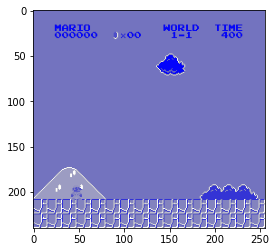

In [100]:
plt.imshow(state[0])

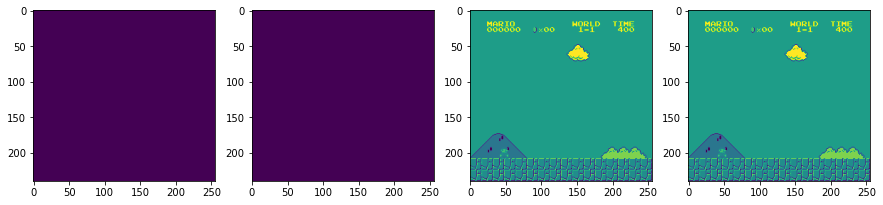

In [101]:
# Note run state, reward, done, info = env.step([env.action_space.sample()])
# Four times to get the visulaization of four steps in the environment
plt.figure(figsize=(15,10))
for idx in  range(state.shape[3]):
    plt.subplot(1, 4, idx+1)
    plt.imshow(state[0][:, :, idx])
plt.show()

## Training The Model

In [102]:
# Import os for file path management
import os
# Import PPO Reinforcement algorithm
from stable_baselines3 import PPO
# Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback

In [103]:
# Setup Directory for saving tensorboard logs and trained models
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [104]:
# Setup the PPO Reinforcement Learning model
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, device="cuda", learning_rate=0.000001, n_steps=512) 

Using cpu device
Wrapping the env in a VecTransposeImage.


In [105]:
# Train the model
model.learn(total_timesteps=100000)

Logging to ./logs/PPO_4


----------------------------
| time/              |     |
|    fps             | 58  |
|    iterations      | 1   |
|    time_elapsed    | 8   |
|    total_timesteps | 512 |
----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 8            |
|    iterations           | 2            |
|    time_elapsed         | 119          |
|    total_timesteps      | 1024         |
| train/                  |              |
|    approx_kl            | 9.625568e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.95        |
|    explained_variance   | -0.00191     |
|    learning_rate        | 1e-06        |
|    loss                 | 205          |
|    n_updates            | 10           |
|    policy_gradient_loss | -6.69e-05    |
|    value_loss           | 551          |
------------------------------------------
-----------------------

In [106]:
model.save("./train/thisisatestmodel")

# Model Testing

In [107]:
# Load model
model = PPO.load('./train/thisisatestmodel')

In [108]:
state = env.reset()

In [109]:
# Start the game 
state = env.reset()
# Loop through the game
while True: 
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()

KeyboardInterrupt: 

# 